**Fundamentals of PyTorch**

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Convering a 1D tensor to a 2D tensor and back**

In [ ]:
a = torch.Tensor([1,2,3, 5, 6])
a.shape

torch.Size([5])

In [ ]:
a = a.view(-1, 1)
print(a)
a.shape

tensor([[1.],
        [2.],
        [3.],
        [5.],
        [6.]])


torch.Size([5, 1])

In [ ]:
a = a.view(-1)
print(a)
a.shape

tensor([1., 2., 3., 5., 6.])


torch.Size([5])

**Converting tensor to nparray, list and back**

In [ ]:
a = a.numpy()
type(a)

numpy.ndarray

In [ ]:
a = torch.from_numpy(a)
type(a)

torch.Tensor

In [ ]:
b = pd.Series([1,2,3,3,2,1])
type(b)

pandas.core.series.Series

In [ ]:
b = torch.from_numpy(b.values)
type(b)

torch.Tensor

In [ ]:
b = b.tolist()
type(b)

list

**Extract Value(s) from the Tensor**

In [ ]:
a

tensor([1., 2., 3., 5., 6.])

In [ ]:
a[0], a[4]

(tensor(1.), tensor(6.))

In [ ]:
a[0].item()

1.0

In [ ]:
a[4].item()

6.0

**Indexing & Slicing**

In [ ]:
a

tensor([1., 2., 3., 5., 6.])

In [ ]:
a[1]

tensor(2.)

In [ ]:
a[1] = 400
a

tensor([  1., 400.,   3.,   5.,   6.])

In [ ]:
c = a[2:4]
c

tensor([3., 5.])

In [ ]:
a[1:3] = torch.Tensor([110, 200])
a

tensor([  1., 110., 200.,   5.,   6.])

**Vector Addition**

In [ ]:
a = torch.Tensor([1, 2, 3, 4])
b = torch.Tensor([3, 1, 4, 1])
c = a + b
c

tensor([4., 3., 7., 5.])

In [ ]:
a = a + 1
a

tensor([2., 3., 4., 5.])

**Vector Multiplication by a Scaler**

In [ ]:
a = a * 2
a

tensor([ 4.,  6.,  8., 10.])

**Hadamard Product**

In [ ]:
a = torch.Tensor([2, 3])
b = torch.Tensor([3, 4])
c = a * b
c

tensor([ 6., 12.])

**Dot Product**

In [ ]:
c = torch.dot(a, b)
c

tensor(18.)

**Universal Functions**

In [ ]:
mean, median, max, min, std, var, sum, prod = a.mean, a.median(), a.max(), a.min(), a.std(), a.var(), a.sum(), a.prod()
mean, median, max, min, std, var, sum, prod

(<function Tensor.mean>,
 tensor(2.),
 tensor(3.),
 tensor(2.),
 tensor(0.7071),
 tensor(0.5000),
 tensor(5.),
 tensor(6.))

**Mathematical Functions**

In [ ]:
a = torch.linspace(np.pi, np.pi**2, 100)
b = torch.sin(a)
c = torch.cos(a)

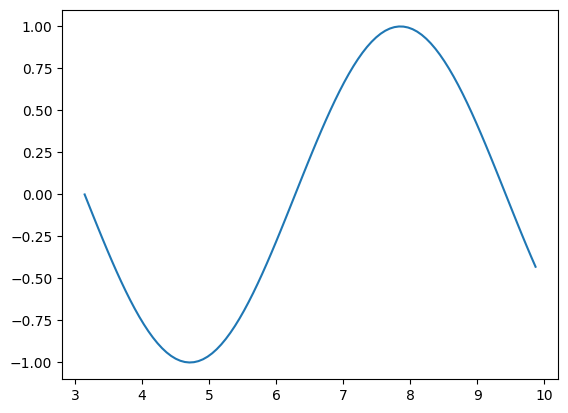

In [ ]:
plt.plot(a, b)

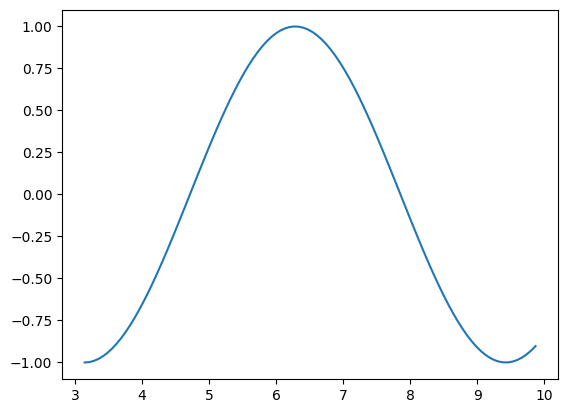

In [ ]:
plt.plot(a, c)

**Derivates**

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 2*x + x*3

In [ ]:
y.backward()
x.grad

tensor(9.)

**Transform existing data**

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torchvision.transforms import Compose

In [ ]:
transform = Compose([transforms.CenterCrop(20),
                    transforms.RandomHorizontalFlip(p=0.5),
                    transforms.RandomRotation(10),
                    transforms.RandomVerticalFlip(p=0.5),
                    transforms.ToTensor()
                    ])
dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

In [ ]:
print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 20, 20])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  9
The type of the second element in the tuple:  <class 'int'>


**Simple Linear Regressions**

In [ ]:
from torch.nn import Linear

In [ ]:
class LR(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
torch.manual_seed(42)

model = LR(2, 1)
list(model.parameters())

[Parameter containing:
 tensor([[0.5406, 0.5869]], requires_grad=True),
 Parameter containing:
 tensor([-0.1657], requires_grad=True)]

In [ ]:
x = torch.tensor([[1.0, 2.0], [4, 4.5]])
y_hat = model(x)
y_hat

tensor([[1.5488],
        [4.6379]], grad_fn=<AddmmBackward0>)